<a href="https://colab.research.google.com/github/anandkota279/PRODIGY_ML_01/blob/main/PRODIGY_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (1460, 81)

Dataset description:
                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.2

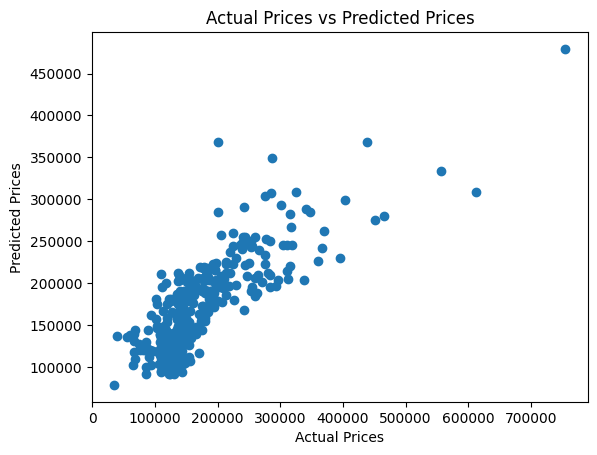

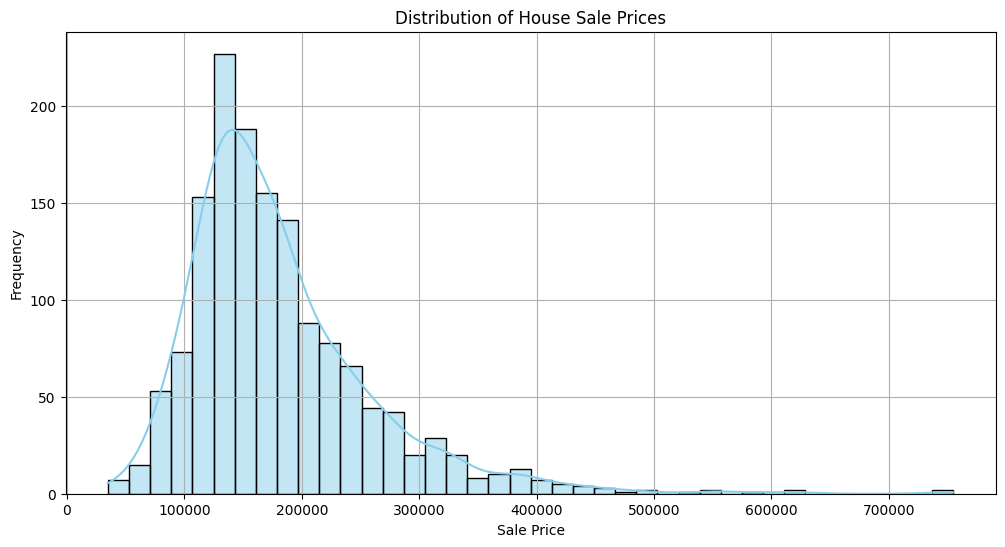

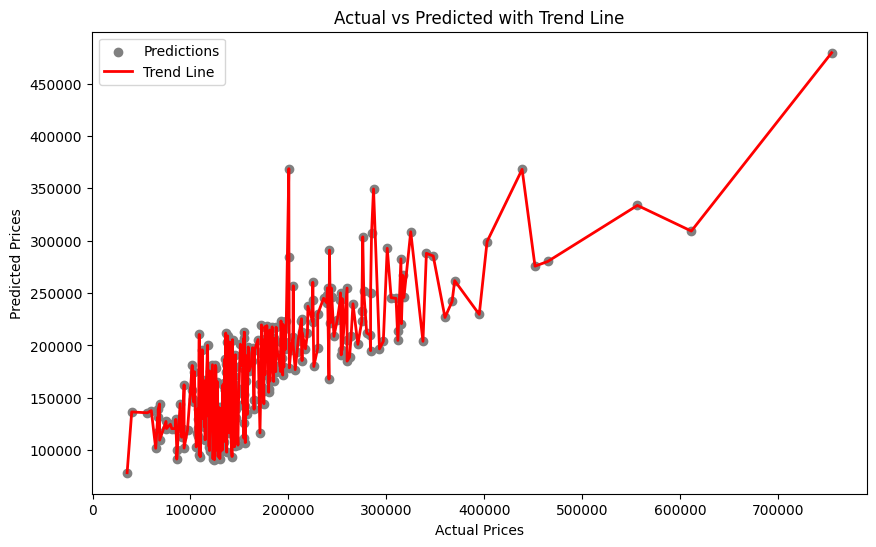

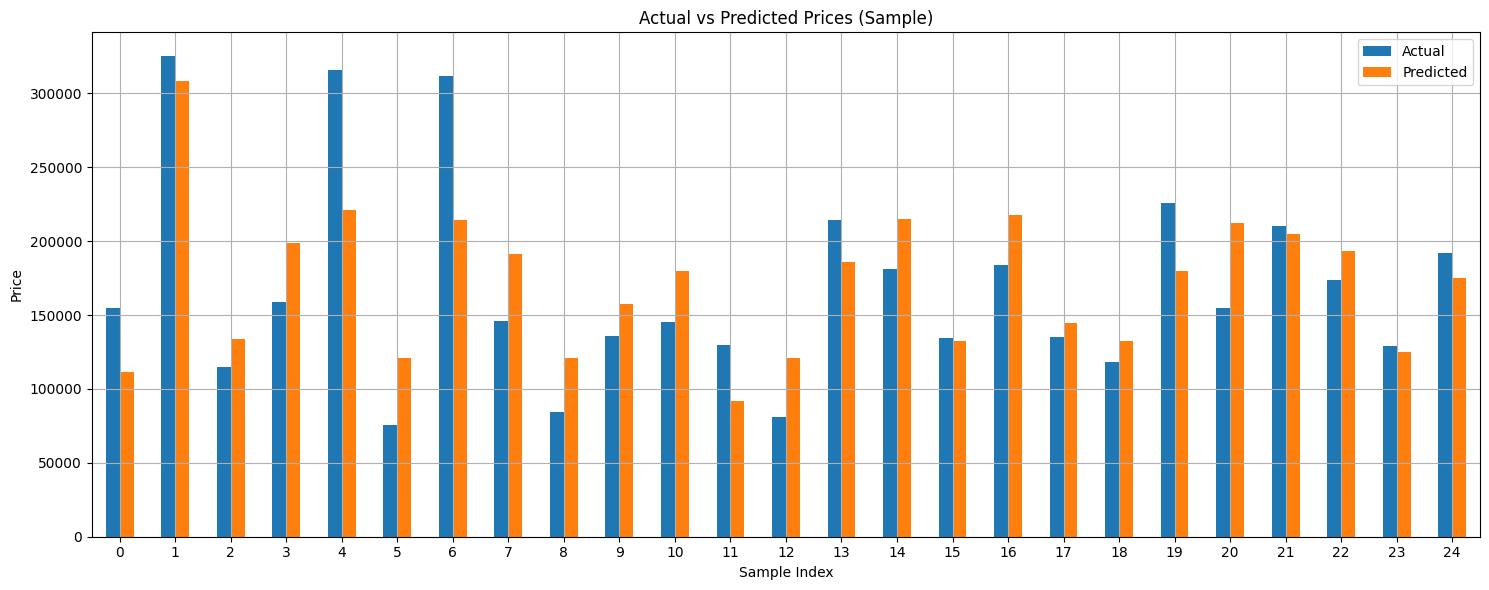

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataset = pd.read_csv('/content/train.csv')

print("Dataset shape:",dataset.shape)
print("\nDataset description:\n",dataset.describe())
print("\nDataset head:\n",dataset.head())
print("\nDataset tail:\n",dataset.tail())
print("\nMissing values:\n", dataset.isnull().sum())

dataset['TotalBath'] = dataset['FullBath'] + 0.5 * dataset['HalfBath']
features=dataset[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]
target = dataset['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(dataset['SalePrice'], kde=True, color='skyblue', bins=40)
plt.title("Distribution of House Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


sorted_idx = np.argsort(y_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='gray', label='Predictions')
plt.plot(y_test.iloc[sorted_idx], y_pred[sorted_idx], color='red', linewidth=2, label='Trend Line')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted with Trend Line")
plt.legend()
plt.show()


comparison_df = pd.DataFrame({'Actual': y_test.values[:25], 'Predicted': y_pred[:25]})
comparison_df.plot(kind='bar', figsize=(15, 6))
plt.title("Actual vs Predicted Prices (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()
